In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./iris/iris.data', header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(df.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [36]:
print(f"Размерность датасета: {df.shape}")
print(f"Количество признаков: {len(df.drop("class", axis=1).columns)}")
print(f"Количество целевых классов: {df["class"].nunique()}")
print(f"Количество объектов в каждом из классов:\n{df["class"].value_counts()}")
print(f"Объектов с неопределёнными признаками: {df[df.isnull().any(axis=1)].shape[0]/df.shape[0]}%")
print(f"Другие ключевые свойства датасета:\n{df.describe()}")

Размерность датасета: (150, 5)
Количество признаков: 4
Количество целевых классов: 3
Количество объектов в каждом из классов:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Объектов с неопределёнными признаками: 0.0%
Другие ключевые свойства датасета:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [37]:
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for key in colors:
    print(f'{key}: {colors[key]}')

Iris-setosa: red
Iris-versicolor: green
Iris-virginica: blue


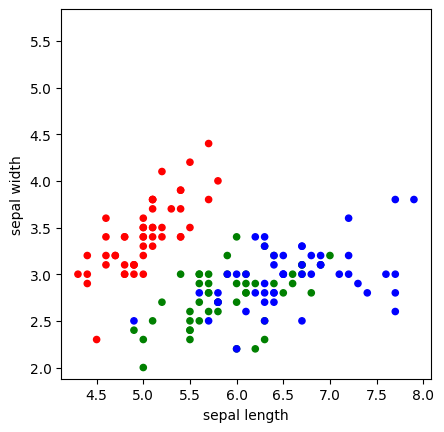

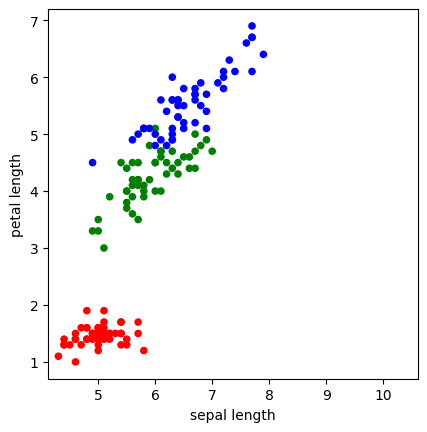

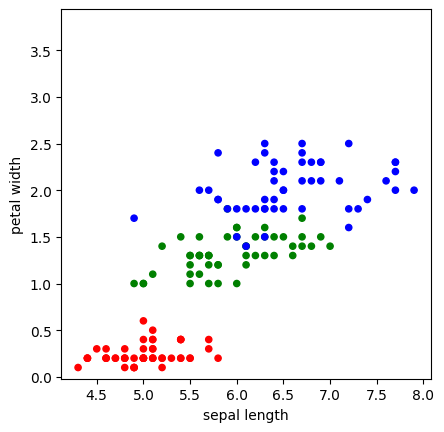

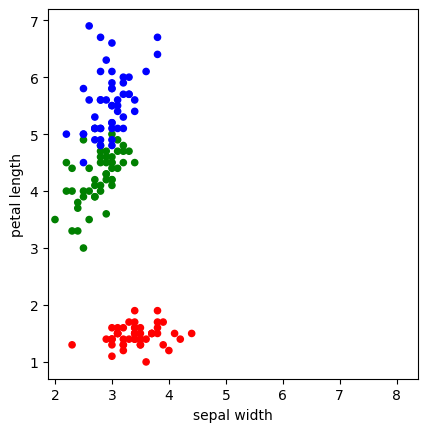

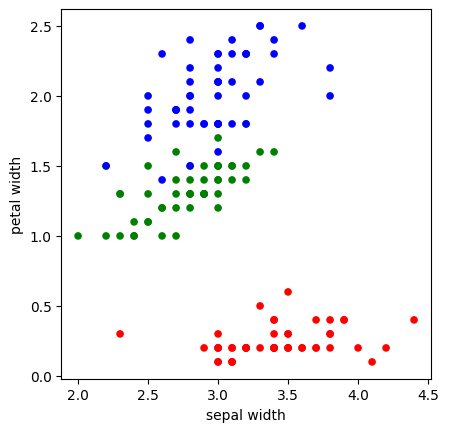

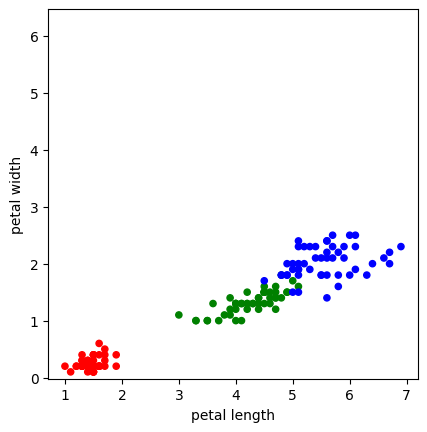

In [38]:
df.plot.scatter(x="sepal length", y="sepal width", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal length", y="petal length", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal length", y="petal width", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal width", y="petal length", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal width", y="petal width", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="petal length", y="petal width", c=df['class'].map(colors))
plt.axis('square')
plt.show()

In [39]:
df_setosa = df[df['class'] == 'Iris-setosa']
df_versicolor = df[df['class'] == 'Iris-versicolor']
df_virginica = df[df['class'] == 'Iris-virginica']

Плотности вероятностей sepal length:


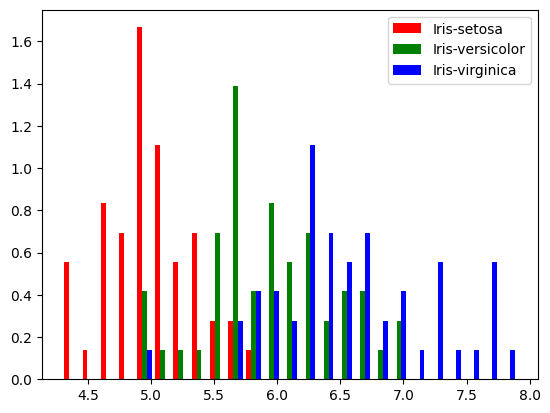

Плотности вероятностей sepal width:


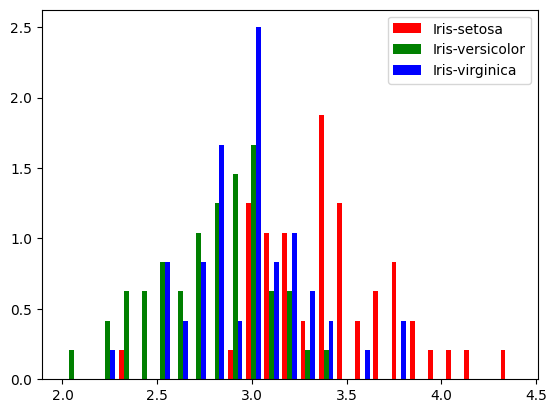

Плотности вероятностей petal length:


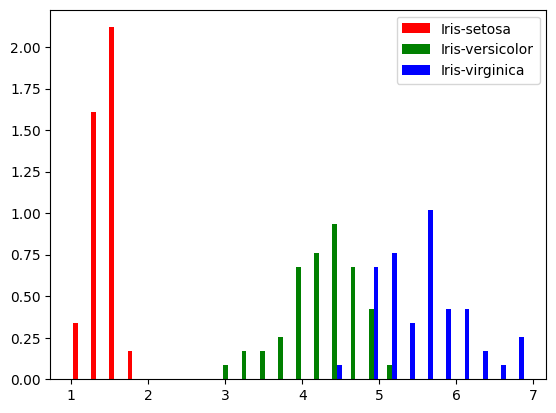

Плотности вероятностей petal width:


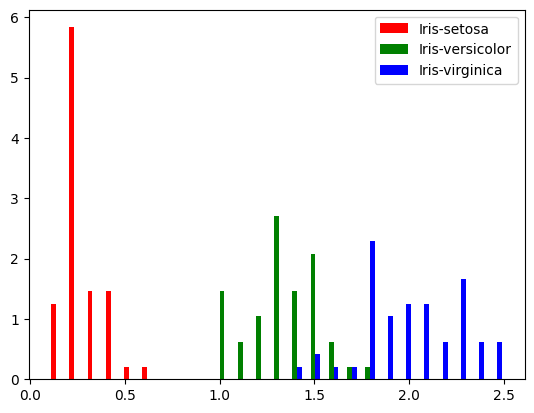

In [40]:
for i in range(df.shape[1] - 1):
    print(f"Плотности вероятностей {df.columns[i]}:")
    plt.hist([df_setosa[df.columns[i]],
              df_versicolor[df.columns[i]],
              df_virginica[df.columns[i]]],
             bins=25, histtype='bar', color=colors.values(), density=True, label=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    ax = plt.legend()
    plt.show()

In [41]:
print(f"Матрица корреляции для всей таблицы:\n{df.drop(['class'], axis=1).corr(method='pearson')}\n")
print(f"Матрица корреляции для Iris-setosa:\n{df_setosa.drop(['class'], axis=1).corr(method='pearson')}\n")
print(f"Матрица корреляции для Iris-versicolor:\n{df_versicolor.drop(['class'], axis=1).corr(method='pearson')}\n")
print(f"Матрица корреляции для Iris-virginica:\n{df_virginica.drop(['class'], axis=1).corr(method='pearson')}\n")

Матрица корреляции для всей таблицы:
              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000

Матрица корреляции для Iris-setosa:
              sepal length  sepal width  petal length  petal width
sepal length      1.000000     0.746780      0.263874     0.279092
sepal width       0.746780     1.000000      0.176695     0.279973
petal length      0.263874     0.176695      1.000000     0.306308
petal width       0.279092     0.279973      0.306308     1.000000

Матрица корреляции для Iris-versicolor:
              sepal length  sepal width  petal length  petal width
sepal length      1.000000     0.525911      0.754049     0.546461
sepal width       0.525911     1.000000      0.560522     0.663999
petal length  

In [42]:
combinations = []
for i in range(df.shape[1] - 1):
    for j in range(i + 1, df.shape[1] - 1):
        combinations.append((i, j))
print(combinations)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [43]:
levels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

def plot_decision_boundaries(x, y, model, title, fill):
    model_instance = model()
    model_instance.fit(x,y)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    z = model_instance.predict(np.c_[xx.ravel(), yy.ravel()])
    mapped_colors = np.array([levels[c] for c in z])
    mapped_colors = mapped_colors.reshape(xx.shape)
    if fill:
        plt.contourf(xx, yy, mapped_colors, alpha=0.8)
    else:
        plt.contour(xx, yy, mapped_colors)
    plt.scatter(x[:, 0], x[:, 1], c=y.map(colors), edgecolors='k', marker='o')
    plt.title(title)

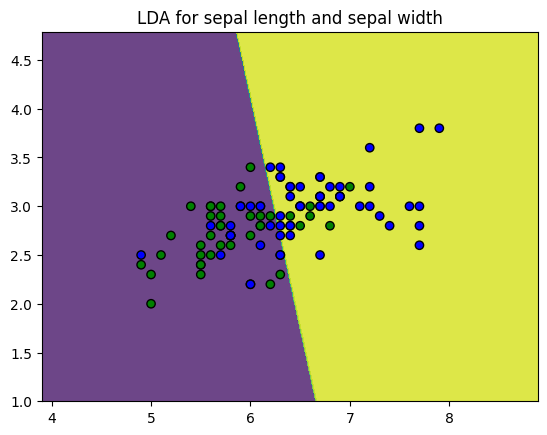

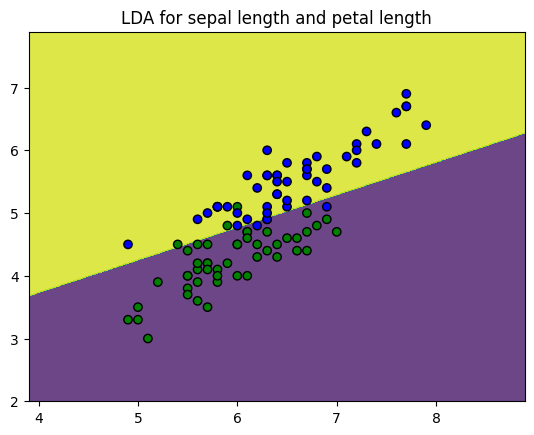

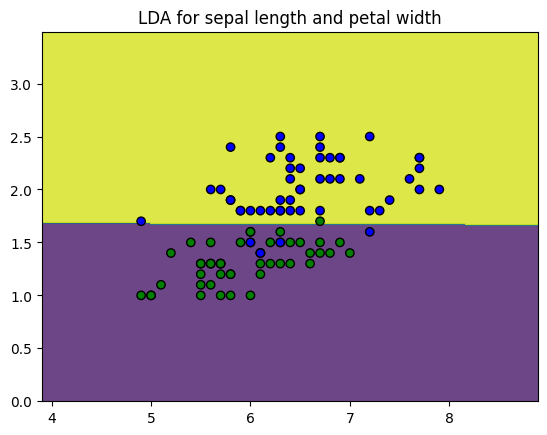

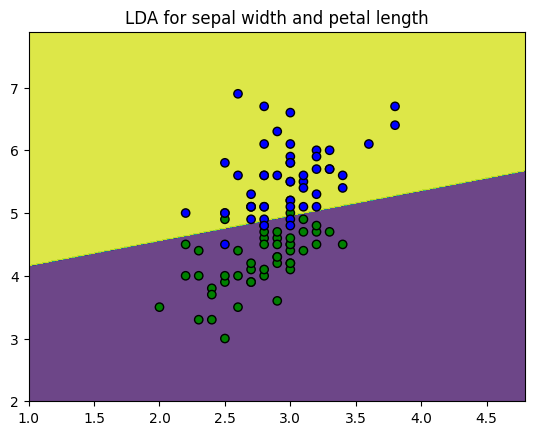

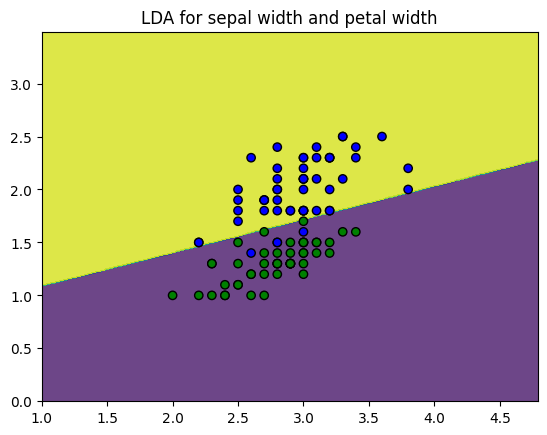

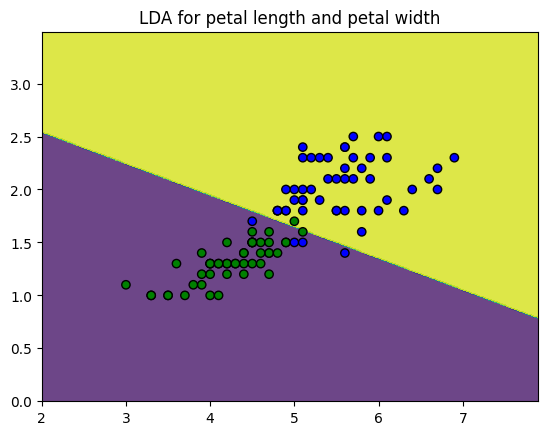

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

df_reduced = df[df['class'] != 'Iris-setosa']
for cmb in combinations:
    plot_decision_boundaries(df_reduced.iloc[:, [cmb[0], cmb[1]]].to_numpy(), df_reduced["class"], LDA, f'LDA for {df_reduced.columns[cmb[0]]} and {df_reduced.columns[cmb[1]]}', True)
    plt.show()

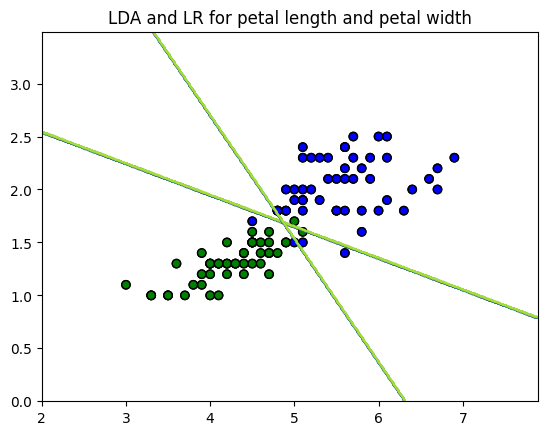

In [45]:
from sklearn.linear_model import LogisticRegression as LR

plot_decision_boundaries(df_reduced.iloc[:, [2, 3]].to_numpy(), df_reduced["class"], LDA, '', False)
plot_decision_boundaries(df_reduced.iloc[:, [2, 3]].to_numpy(), df_reduced["class"], LR, f'LDA and LR for petal length and petal width', False)
plt.show()

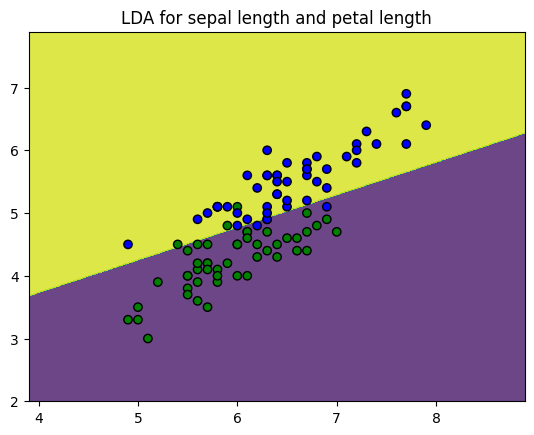

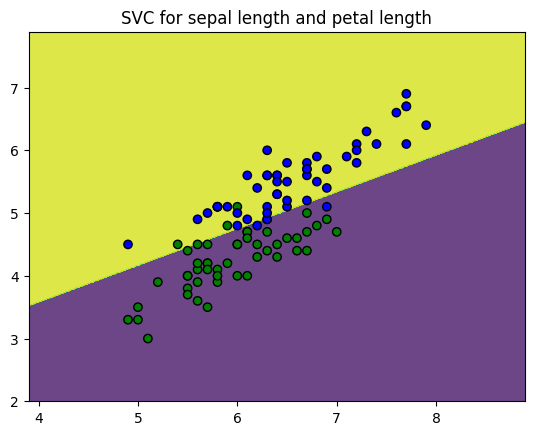

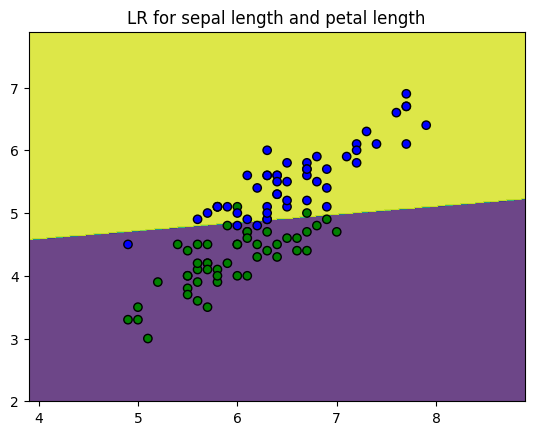

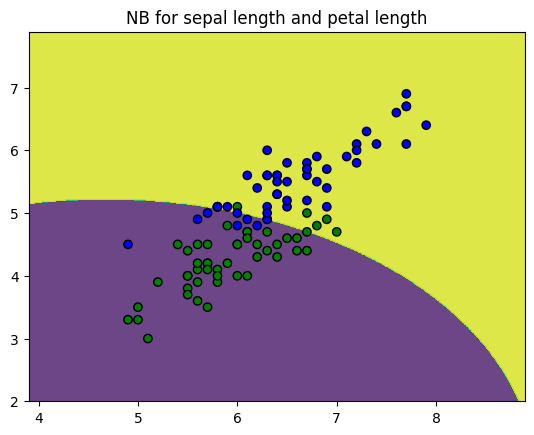

In [46]:
from sklearn.svm import LinearSVC as SVC
from sklearn.naive_bayes import GaussianNB as NB

plot_decision_boundaries(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"], LDA, 'LDA for sepal length and petal length', True)
plt.show()
plot_decision_boundaries(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"], SVC, 'SVC for sepal length and petal length', True)
plt.show()
plot_decision_boundaries(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"], LR, 'LR for sepal length and petal length', True)
plt.show()
plot_decision_boundaries(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"], NB, 'NB for sepal length and petal length', True)

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

def method_metrics(x, y, model, name):
    print(name)
    target_class = y[0]
    print(f"Целевой класс: {target_class}")
    model_instance = CalibratedClassifierCV(model()) if model == SVC else model()
    model_instance.fit(x, y)
    pred_df = pd.DataFrame({'true': y, 'pred': model_instance.predict(x)})
    
    tp = ((pred_df['true'] == target_class) & (pred_df['pred'] == target_class)).sum()
    fp = ((pred_df['true'] != target_class) & (pred_df['pred'] == target_class)).sum()
    fn = ((pred_df['true'] == target_class) & (pred_df['pred'] != target_class)).sum()
    tn = ((pred_df['true'] != target_class) & (pred_df['pred'] != target_class)).sum()
    print(f'TP: {tp / pred_df.shape[0]} FP: {fp / pred_df.shape[0]}')
    print(f'FN: {fn / pred_df.shape[0]} TN: {tn / pred_df.shape[0]}')
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}")
    
    y_scores = model_instance.predict_proba(x)[:, 0]
    y_true = pred_df['true'] == target_class
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    print(f"AUC: {auc(fpr, tpr)}")
    
    plt.plot(fpr, tpr, color='blue', linewidth=5)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Диагональ
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Ложноположительная скорость')
    plt.ylabel('Истинноположительная скорость')
    plt.title(f'ROC кривая для {name}')
    plt.grid()
    plt.axis('square')
    plt.show()

LDA
Целевой класс: Iris-versicolor
TP: 0.47 FP: 0.03
FN: 0.03 TN: 0.47
sensitivity: 0.94, specificity: 0.94, precision: 0.94
AUC: 0.985


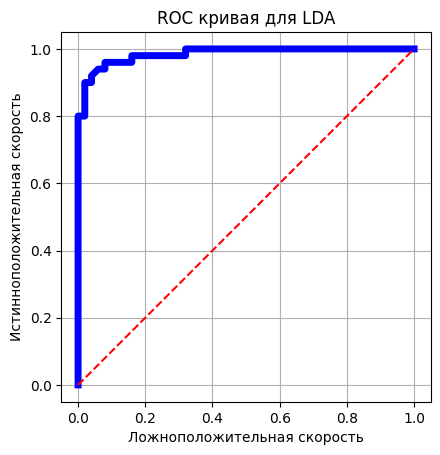

SVM
Целевой класс: Iris-versicolor
TP: 0.47 FP: 0.03
FN: 0.03 TN: 0.47
sensitivity: 0.94, specificity: 0.94, precision: 0.94
AUC: 0.9817999999999999


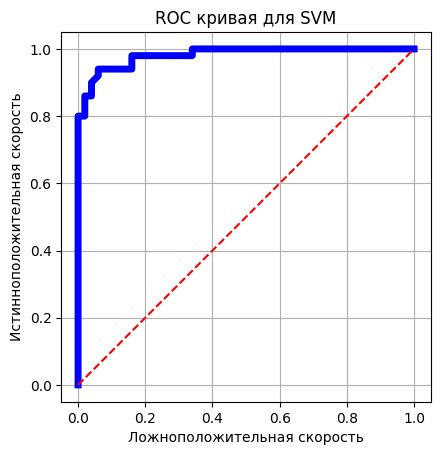

LR
Целевой класс: Iris-versicolor
TP: 0.47 FP: 0.03
FN: 0.03 TN: 0.47
sensitivity: 0.94, specificity: 0.94, precision: 0.94
AUC: 0.9882


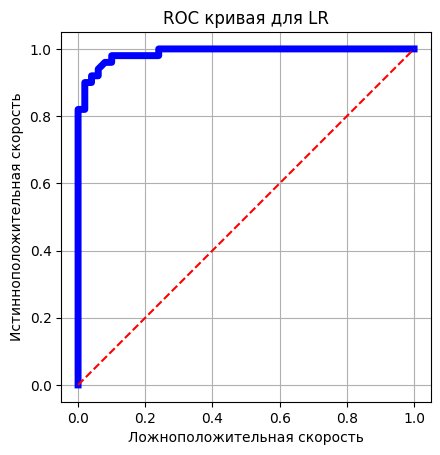

NB
Целевой класс: Iris-versicolor
TP: 0.44 FP: 0.07
FN: 0.06 TN: 0.43
sensitivity: 0.88, specificity: 0.86, precision: 0.8627450980392157
AUC: 0.9573999999999999


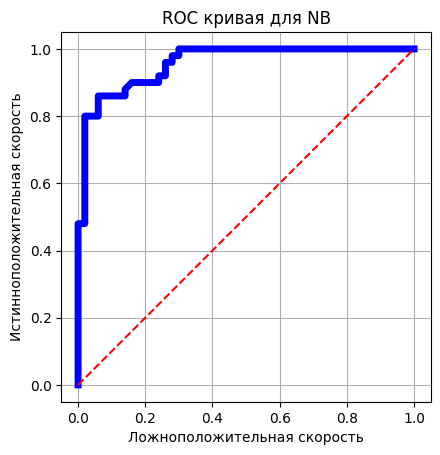

In [56]:
    method_metrics(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"].to_numpy(), LDA, "LDA")
    method_metrics(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"].to_numpy(), SVC, "SVM")
    method_metrics(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"].to_numpy(), LR, "LR")
    method_metrics(df_reduced.iloc[:, [0, 2]].to_numpy(), df_reduced["class"].to_numpy(), NB, "NB")